<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.855 · Modelos avanzados de minería de datos · PEC1</p>
<p style="margin: 0; text-align:right;">2018-1 · Máster universitario en Ciencia de datos (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# PEC 1: Preparación de datos

A lo largo de esta práctica veremos como aplicar distintas técnicas para la carga y preparación de datos:

 <ol start="1">
  <li>Carga de conjuntos de datos</li>
  <li>Análisis de los datos
  <br>2.1 Análisis estadístico básico
  <br>2.2 Análisis exploratorio de los datos
  <li>Reducción de dimensionalidad</li>
  <li>Aplicación de CART</li>
</ol>
   
Para ello vamos a necesitar las siguientes librerías:

In [1]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
pd.set_option('display.max_columns', None)

# 1. Carga del conjunto de datos (1 punto)

En primer lugar, deberéis cargar el conjunto de datos Breast Cancer Wisconsin (más información en https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). Éste se puede descargar de Internet o puede ser cargado directamente de la librería "scikit-learn", que incorpora un conjunto de datasets muy conocidos y empleados para minería de datos y machine learning (http://scikit-learn.org/stable/datasets/index.html).

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> Cargad el conjunto de datos "Breast Cancer Wisconsin" y mostrad el número y nombre de los atributos (variables que podrían ser usadas para predecir la respuesta "Diagnosis"), así como el número de filas obtenidas.
<hr>
Sugerencia: si usáis sklearn (sklearn.datasets.load_breast_cancer), explorad las diferentes keys del objeto obtenido.
</div>

In [2]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd

breast_cancer = load_breast_cancer()
breast_cancer.feature_names # "nombre de los atributos" considerando que estamos hablando de las features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [3]:
print("Número de atributos:", len(breast_cancer.feature_names))

Número de atributos: 30


In [4]:
data = np.c_[breast_cancer.data, breast_cancer.target]
columns = np.append(breast_cancer.feature_names, ["target"])
df = pd.DataFrame(data, columns=columns)
#df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
print("Número de filas obtenidas:", df.shape[0])

Número de filas obtenidas: 569


In [5]:
print("Mirando las keys: ", breast_cancer.keys())

Mirando las keys:  dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


# 2. Análisis de los datos

## 2.1 Análisis estadístico básico (1 punto)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> Realizad un análisis estadístico básico indicando, para cada atributo numérico del conjunto de datos, su valor medio y desviación estándard. Para las variables categóricas (en los atributos o la respuesta, si las hay), mostrad la frecuencia con la que aparecen las diferentes clases.
<hr>
Sugerencia: podeis usar la librería 'pandas' y sus funciones 'describe' y 'value_counts'
</div>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [7]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [8]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [9]:
# Benign = 0 (negative class)
# Malignant = 1 (positive class)
li_target = [1 if x==0 else 0 for x in list(breast_cancer.target)]
print(pd.Series(li_target).value_counts())

0    357
1    212
dtype: int64


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> Comentad los resultados.
</div>

Básicamente tenemos un total de **569** filas en el dataset *breast_cancer* como habíamos visto anteriormente, de los cuales, **357** con resultado = *Benign* y **212** = *Malignant*.

Los **30** atributos son numéricos (detectado con en comando `info`). 

De estos, el comando `describe` ha traído média, desviación estándard entre otros.

Aparentemente no hay *missing values*.

## 2.2 Análisis exploratorio de los datos (3 puntos)

En este ejercicio vamos a explorar la relación de algunos de los atributos numéricos con la variable respuesta ("Diagnosis"), tanto gráficamente como cuantitativamente. Para empezar, seleccionad los 4 atributos que queréis explorar. Si habéis usado los nombres de columnas proporcionados por sklearn, una lista de posibles nombres de atributos serían:

In [10]:
feats_to_explore = ['mean radius', 'mean texture', 'mean smoothness', 'mean symmetry']

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> Utilizando una librería gráfica, como por ejemplo "matplotlib", realizad un gráfico del histograma de valores para cada uno de los atributos seleccionados, separados por los valores de clase de la respuesta ("Diagnosis"). La finalidad es observar como se distribuye cada uno de los atributos en función del valor de clase que toman, para poder identificar de forma visual y rápida si algunos atributos permiten diferenciar de forma clara los diferentes diagnósticos de los tumores.
</div>

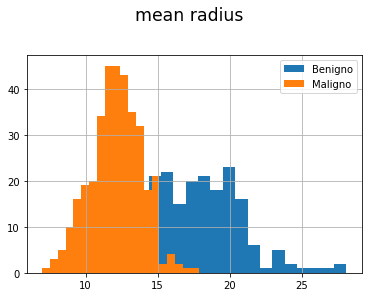

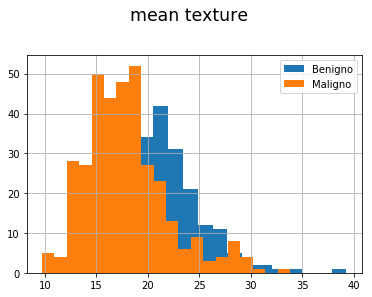

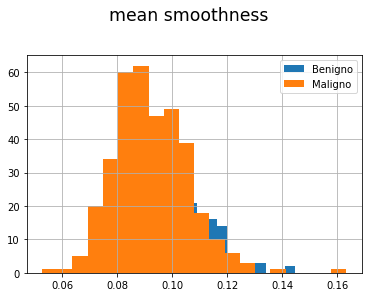

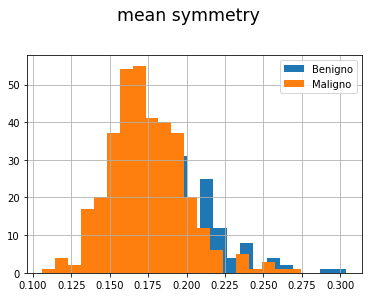

In [11]:
for feature in feats_to_explore:
    plt.suptitle(feature, x=0.5, y=1.05, ha='center', fontsize='xx-large')
    df[df.target==0][feature].hist(bins=20,label="Benigno")
    df[df.target==1][feature].hist(bins=20,label="Maligno")
    plt.legend(loc='upper right')
    plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> Para cada uno de los atributos representados en el ejercicio anterior, mostrad la media y la desviación estándard para cada valor de clase de la respuesta ("Diagnosis"). La finalidad es verificar numéricamente las diferencias identificadas anteriormente de forma visual.
</div>

In [12]:
d = []
for f in feats_to_explore:
    d.append({'Feature': f, 'Media': np.mean(df[df.target==0][f]), 'Desviación Estándard':
        np.std(df[df.target==0][f]), 'Diagnosis':'Benigno'})
    d.append({'Feature': f, 'Media': np.mean(df[df.target==1][f]), 'Desviación Estándard':
        np.std(df[df.target==1][f]), 'Diagnosis':'Maligno'})

pd.DataFrame(d)

,Desviación Estándard,Diagnosis,Feature,Media
0,3.196406,Benigno,mean radius,17.462830
1,1.778016,Maligno,mean radius,12.146524
2,3.770546,Benigno,mean texture,21.604906
3,3.989525,Maligno,mean texture,17.914762
4,0.012578,Benigno,mean smoothness,0.102898
5,0.013427,Maligno,mean smoothness,0.092478
6,0.027573,Benigno,mean symmetry,0.192909
7,0.024772,Maligno,mean symmetry,0.174186


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong>
<br> - Mirando los gráficos, qué atributos te parece que tienen valores claramente diferentes para diagnósticos benignos y malignos? Qué atributos no?
<br> - Mirando a los valores medios y desviaciones estándard calculadas, te parecen significativas las diferencias para diagnósticos benignos y malignos?
<br> - BONUS: qué test estadístico podrías usar para comparar las distribuciones de los valores de los atributos cuando los diagnósticos son benignos o malignos? Úsalo para evaluar qué atributos (de entre todos los del conjunto de datos) tienen valores más parecidos en tumores benignos y malignos. Interpreta el resultado.
</div>

 - La feature `mean radius` presenta los valores que son significativamente más diferentes mientras comparamos los diagnósticos de *benigno* o *maligno*. Sus valores entre **0 - 15** concentran una gran cantidad de tumores *Malignos*, con una separación donde a partir de **15**, la tendencia es que los tumores sean *benignos*.
 - `mean texture`también presenta un poco de diferencia, pero no tan evidente como el anterior.
 - `mean symmetry` y especialmente `mean smoothness` no tienen los valores claramente separados en los gráficos.
 
 Otro argumento que corrobora con el análisis de los gráficos es que notamos que las diferencias en `mean smoothness` y `mean symmetry` son muy pequeñas entre cada diagnóstico posible, mientras tanto, si observamos también las features `mean radius` y `mean texture` hay cambios notables tanto de **Desviación Estándard** cuanto **Media**.
 

# 3. Reducción de dimensionalidad (2 puntos)

En este ejercicio deberéis aplicar métodos de reducción de dimensionalidad al conjunto original de datos. El objetivo es reducir el conjunto de atributos a un nuevo conjunto con menos dimensiones.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> Aplicad los métodos de reducción de dimensionalidad:
<br>- Principal Component Analysis (PCA)
<br>- t-distributed Stochastic Neighbor Embedding (t-SNE)
<br>para reducir el conjunto de datos a 2 dimensiones.

<hr>
Sugerencia: No es necesario que programéis los algoritmos, podéis hacer uso de las implementaciones disponibles en la librería "scikit-learn".
</div>

In [14]:
####### --- Reducción con PCA --- #######
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Separando las features de los targets
x = df.loc[:, breast_cancer.feature_names].values
y = df.loc[:, ['target']].values

#Normalizando
x = StandardScaler().fit_transform(x)


pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDfPCA = pd.concat([principalDf, df[['target']]], axis = 1)
finalDfPCA.head()

,principal component 1,principal component 2,target
0,9.192837,1.948583,0.0
1,2.387802,-3.768172,0.0
2,5.733896,-1.075174,0.0
3,7.122953,10.275589,0.0
4,3.935302,-1.948072,0.0


In [15]:
####### --- Reducción con t-SNE --- #######
from sklearn.manifold import TSNE

model = TSNE(learning_rate=100) # intentado diferentes valores entre 50 y 200

# fit_transform simultaneamente encaja y transforma los datos
x2 = df.loc[:, breast_cancer.feature_names].values
transformed = model.fit_transform(x2)

principalDfTSNE = pd.DataFrame(data = transformed
             , columns = ['Component 1', 'Component 2'])
finalDfTSNE = pd.concat([principalDfTSNE, df[['target']]], axis = 1)
finalDfTSNE.head()

,Component 1,Component 2,target
0,-20.170561,-24.904449,0.0
1,-17.926821,-23.166443,0.0
2,-19.039598,-18.329529,0.0
3,22.669830,6.822385,0.0
4,-21.255129,-17.468649,0.0


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> Generad un gráfico (en 2D) con el resultado de cada uno de los métodos de reducción de la dimensión, usando colores diferentes para cada clase de la respuesta, con el objetivo de visualizar si es posible separar eficientemente las clases empleando estos métodos.</div>

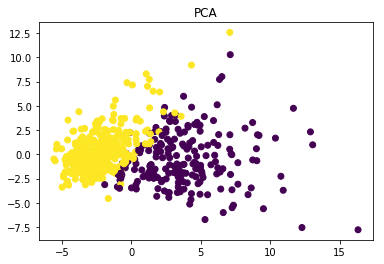

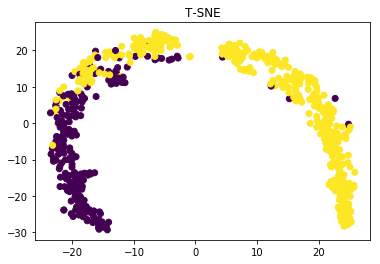

In [16]:
# Generando el grafico de PCA
PCAxs = principalComponents[:,0]
PCAys = principalComponents[:,1]

plt.scatter(PCAxs, PCAys, c=df['target'])
plt.title('PCA')
plt.show()


# Generando el grafico de TSNE
TSNExs = transformed[:,0]
TSNEys = transformed[:,1]
plt.scatter(TSNExs, TSNEys, c=df['target'])
plt.title('T-SNE')
plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong>
<br> - Qué método de reducción de dimensionalidad ha resultado más efectivo para visualizar las dos clases de diagnóstico de forma separada?
<br> - BONUS: cuándo es más apropriado usar PCA o t-SNE?
</div>

Desde mi punto de vista, PCA ha mezclado menos los datos si miramos la presentación de los gráficos presentados anteriormente.
Aún así, me gustaria destacar que T-SNE no se puede completamente interpretar basado en los gráficos generados, una vez que cada ejecución del algoritmo va a resultar en distintos gráficos: Más detalles explicados aquí: https://www.youtube.com/watch?v=judlSt97TWI min: 3:09

Cuando es más apropriado usar PCA o t-SNE: Quedaría con la conclusión de Navjot, 2018 (https://towardsdatascience.com/dimensionality-reduction-by-stacking-pca-and-t-sne-420d9fcfab54): 
> *Often in Machine Learning problems, instead of 2 (or more) algorithms competing, the best results are sometimes found by combining them in a way where they can use each other’s speciality.*

# 4. Aplicación de CART (3 puntos)

En este último ejercicio se trata de aplicar un método de aprendizaje supervisado, concretamente los árboles de decisión, para predecir el diagnóstico de cáncer de mama (tumor benigno o maligno) y evaluar la precisión obtenida con el modelo, usando:

- El conjunto de datos original con todos los atributos
- El conjunto de datos reducido a sólo 2 atributos con el método PCA

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> Entrenad dos modelos usando árboles de decisión (con una profundidad máxima limitada a 3 niveles para mantener el modelo simple): uno usando el conjunto de datos original y el otro usando el conjunto de datos reducido con PCA.
<br>Calculad la precisión de las predicciones obtenidas por cada uno de los modelos (accuracy) así como la matriz de confusión asociada.
<hr>
Sugerencia: es necesario que generéis un conjunto de datos de entrenamiento para calibrar el modelo, y otro conjunto de test para evaluar la bondad de cada uno de los modelos creados. Podéis usar los módulos 'train_test_split', 'DecisionTreeClassifier' y las funciones dentro del módulo 'metrics' de sckit-learn.
</div>

In [31]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

def myDecisionTree(myDF):
    # Si fuera el caso de tener NAs
    myDF = myDF.dropna()
    X = myDF.drop('target', axis=1)
    t = myDF['target']

    X_train, X_test, y_train, y_test = train_test_split(X, t, random_state=1)
    model = tree.DecisionTreeClassifier(max_depth=3)

    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)

    print("Accuracy Score: ", accuracy_score(y_test, y_predict))

    return pd.DataFrame(
        confusion_matrix(y_test, y_predict),
        columns=['Predicted Benigno', 'Predicted Maligno'],
        index=['True Benigno', 'True Maligno']
    )

In [32]:
##################### ---- PCA ---- ##########################
dfDecisionTreePCA = myDecisionTree(finalDfPCA)
dfDecisionTreePCA

Accuracy Score:  0.9440559440559441


,Predicted Benigno,Predicted Maligno
True Benigno,51,4
True Maligno,4,84


In [33]:
##################### ---- ORIGINALES ---- ##########################
dfDecisionTree = myDecisionTree(finalDfPCA)
dfDecisionTree

Accuracy Score:  0.9440559440559441


,Predicted Benigno,Predicted Maligno
True Benigno,51,4
True Maligno,4,84


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong>
<br> - Con qué tipo de datos (originales o reducidos) has obtenido una precisión (accuracy) mayor?
<br> - Si el usuario del modelo de predicción, un hospital por ejemplo, quisese usar el modelo con el menor número de tumores malignos erroneamente clasificados como benignos, cuál de los dos modelos tendría que usar? Porqué?
<br> - Y si el hospital quisese usar el modelo con el menor número de tumores benignos erroneamente clasificados como malignos, cuál de los dos modelos usaría? Porqué?
</div>